<a href="https://colab.research.google.com/github/chayakonchanlun/Multvariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [19]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [20]:
Name = 'ชยากร จันทร์ลุน'
ID = '6230205179'

In [21]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [22]:
Data = DataGenerator(Name,ID)

020:30:15


In [23]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-1.431317,-3.805310,-1.683298,3.670962,5.333743,6.968222,5.297155,-0.622868,-8.659695,0.506338,-2.231758,-4.966134,2.878114,7.374850,1.860676,-0.038871,2.196023,11.370829,6.688385,6.105780,-4.416389,-4.717553,9.194900,0.249966,-1.970441,4.105653,3.420734,4.639702,-1.725424,9.603881,-7.610621,50.019407
1,-0.222700,-4.318604,-1.021648,4.262164,4.447866,10.645853,4.765258,-0.790480,-8.108423,-1.114622,-2.005512,-5.068586,4.139944,7.948390,4.017807,1.361718,3.219721,8.928908,6.658795,5.475026,-4.660510,-4.876859,7.906575,-0.422501,-2.430645,1.426361,4.555166,5.161480,-1.333644,9.095333,-8.637208,47.476663
2,-10.034376,6.161892,-3.954476,-8.050792,-5.352337,6.411617,-6.332182,-7.345645,-7.169272,10.553513,2.975710,0.441505,1.776539,7.340909,0.620935,3.145672,5.817364,8.331761,-8.568314,-4.763978,7.189534,0.715256,-2.086542,3.539530,0.488147,-3.906897,5.546570,-6.069777,7.307131,-8.493889,12.323783,-40.469445
3,2.807811,3.136014,3.270353,6.546945,-5.862550,-12.552502,6.869210,4.978822,-0.880895,7.677638,-2.179459,6.689613,5.866614,2.598473,11.440434,9.917409,6.283930,-1.044869,-11.599362,7.609711,-8.686592,-3.201546,-5.693836,10.478092,-5.883031,-4.733943,-2.132558,-9.512157,0.184631,-8.506297,6.272028,-40.531484
4,0.981739,5.057586,6.035421,6.643368,-9.726732,7.433159,8.389728,-5.688372,4.057948,-1.067151,-0.113727,3.773041,7.207748,8.921411,9.088559,3.895733,-7.498781,8.757467,-2.416330,4.642086,7.698492,-0.165685,6.799617,9.441419,10.733818,-3.927096,-4.872414,-7.582712,-0.734257,7.437834,10.115172,39.189171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.570252,-8.547499,-6.627521,-0.738247,5.041646,8.379100,8.531765,1.861021,-1.478735,-1.421689,4.005371,2.120472,5.035665,-3.002748,8.055580,7.182527,-6.023813,2.258496,7.288834,-8.409583,-10.399815,7.948018,5.700540,6.105651,7.671632,-3.864644,-7.989939,5.141135,-1.598991,5.689240,-17.094999,30.446201
9996,-10.438886,5.510990,-1.623076,-9.326215,-6.385069,6.938657,-6.563878,-8.289501,-5.761271,7.928461,3.251750,1.482022,1.123383,5.989536,1.200461,0.735872,4.707533,8.231279,-10.546153,-4.309346,5.425850,2.465032,-3.326625,1.770823,2.090981,-3.050056,6.267379,-6.057672,8.780392,-10.478475,11.021979,-50.392375
9997,-2.171386,-3.572374,-2.281624,9.609861,3.647927,-7.071517,5.912975,-1.965732,6.946705,-2.177729,-5.651136,-0.720117,-7.696067,-6.032868,-3.678252,2.299576,-0.520670,6.917413,1.350440,-7.531208,6.656311,-5.945639,-10.804183,-1.086603,5.390014,-5.256982,-3.354696,9.149446,9.679640,3.251425,-7.144748,18.257126
9998,0.578091,6.232268,5.490281,5.679421,-9.322961,7.872634,8.821317,-4.478623,6.994061,-1.793188,0.012370,3.955197,8.481484,6.869151,11.919347,2.971310,-9.245483,6.041311,-1.832211,3.352620,8.421936,0.247541,7.469489,9.172441,11.945841,-4.429715,-6.446364,-4.332076,0.118959,7.302469,12.464536,38.512345


# สอบ

# **เริ่มจากตัดตัวที่มี Correlation ออกเพื่อลดข้อมูลที่ไม่จำเป็นออก**

## **ตรวจสอบขนาดของข้อมูล**

In [24]:
Data.shape

(10000, 32)

In [25]:
corr = np.corrcoef(Data.to_numpy().T)

In [26]:
corr.shape

(32, 32)

In [27]:
corr

array([[ 1.        , -0.02653607,  0.0842682 , ...,  0.33009125,
        -0.02653607,  0.33009125],
       [-0.02653607,  1.        ,  0.28305517, ..., -0.143743  ,
         1.        , -0.143743  ],
       [ 0.0842682 ,  0.28305517,  1.        , ..., -0.10285165,
         0.28305517, -0.10285165],
       ...,
       [ 0.33009125, -0.143743  , -0.10285165, ...,  1.        ,
        -0.143743  ,  1.        ],
       [-0.02653607,  1.        ,  0.28305517, ..., -0.143743  ,
         1.        , -0.143743  ],
       [ 0.33009125, -0.143743  , -0.10285165, ...,  1.        ,
        -0.143743  ,  1.        ]])

## เนื่องจากมีจำนวนข้อมูลที่มาก จึงต้องหาค่า Correlation **ที่ซ้ำกัน**

In [28]:
for i in range(corr.shape[0]): #ใช้คำสั่งวนลูปเพื่อดูค่าที่ซ้ำกัน พิจารณาจากค่าที่แสดงผล ถ้ามีการแสดงผลแสดงว่ามีค่าซ้ำ
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 29 column = 31 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


# 2. ทำการ clustering data แล้วทำ visualize ให้ข้อมูลออกมาในรูปแบบ 2 มิติ

In [29]:
from sklearn.cluster import KMeans #ใช้คำสั่งนำเข้า KMeans

In [30]:
kmeans = KM,eans(n_clusters=3 , random_state=2021) #ใช้คำสั่งDefineคือการกำหนดค่า k ที่เราต้องการ

In [31]:
kmeans.fit(Data) #Fit-Transform

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [32]:
kmeans.cluster_centers_ #แสดงจุด cluster centers ที่คำนวณออกมาได้

array([[ 1.27368952e+00,  2.69721312e+00, -2.18861418e+00,
         1.52049597e+00,  1.35948763e+00, -1.66342049e+00,
         2.66935986e+00,  2.12110594e+00,  3.97591973e+00,
        -2.26167165e+00,  6.99883575e-01, -3.85316449e-01,
        -1.36166225e+00, -1.15609100e+00, -3.94378168e+00,
        -4.05717315e-01, -4.85074635e-02,  1.73272007e+00,
         1.48231748e+00, -1.82873887e+00,  1.04893095e+00,
        -9.98687639e-01, -4.45434330e-01, -2.24636768e+00,
         3.91775303e+00, -3.05079689e+00,  5.11040188e-01,
         2.01566556e+00,  1.31604442e+00,  2.33661803e+00,
         5.39442623e+00,  1.36830902e+01],
       [-1.95455906e+00,  7.94491819e-01,  3.33008156e-02,
        -1.03548443e+00,  6.05310320e-01, -2.90237233e+00,
        -1.51176216e+00, -3.07488307e+00, -2.45356592e+00,
         3.03728067e+00, -1.05565746e+00,  3.74117892e+00,
         3.86391944e+00,  3.43520462e+00,  9.19527635e-01,
         4.78632917e+00,  5.14215577e+00,  1.92097748e+00,
        -8.14

In [33]:
E = kmeans.predict(Data) #ทำการทดสอบการจัดกลุ่มของ Data
E

array([2, 2, 1, ..., 0, 2, 2], dtype=int32)

## ทำ PCA ลด **Dimention**

In [34]:
pca = PCA(n_components=2)

In [35]:
new_pca = pca.fit_transform(Data)

In [36]:
import matplotlib

In [37]:
matplotlib.rcParams['figure.figsize']=[15,20]

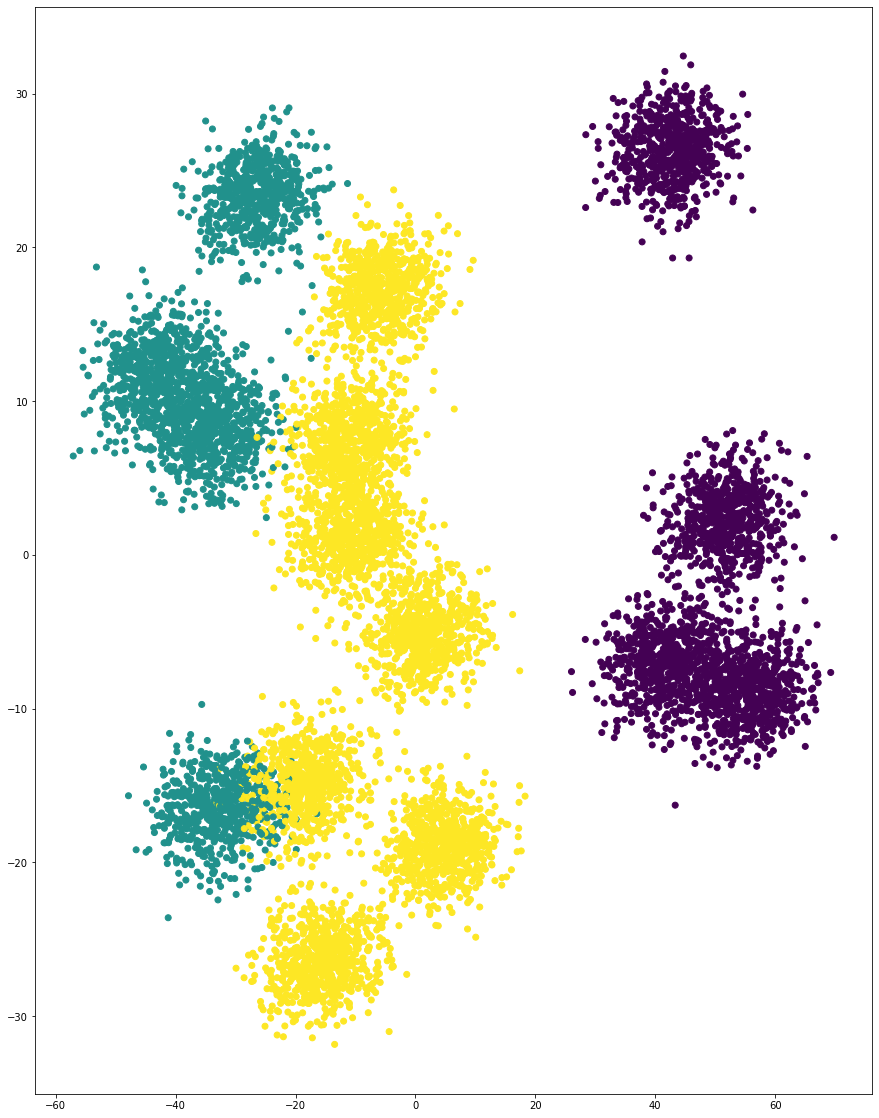

In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Data)
E = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1], c=E)

หาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่ม หรือทำการหาค่า k ที่เหมาะสมของ data

    การหาค่า k ด้วยวิธี The elbow method
    โดยเริ่มจากการคำนวณหาค่า SSE ของ data

In [40]:
kmeans.inertia_

10196224.23516815

In [41]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [42]:

SSE

[20638831.92010504,
 12176335.794695133,
 10196224.23516815,
 8970661.80275478,
 7903901.912406155,
 6875446.393153721,
 6150175.424016003,
 5136927.9223541105]

จากนั้นทำการนำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม

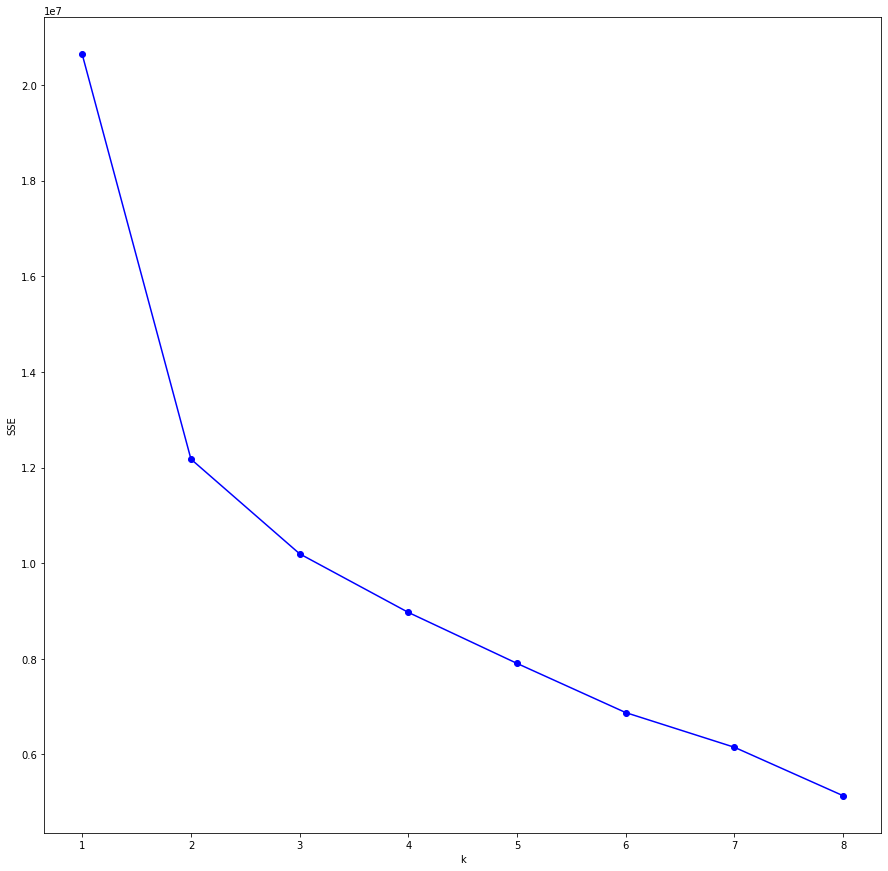

In [44]:
matplotlib.rcParams['figure.figsize']=[15,15]#ขนากกราฟ
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

 จะเห็นว่ากราฟ จุดที่ 3-8 ระยะห่างระหว่างจุดมีค่าใกล้เคียงกัน แต่ว่าจุด 1-2 มีระยะห่างที่ต่างกัน ดังนั้น ค่า K ที่เหมาะสม คือ 2 กลุ่ม

การหาค่า k ด้วยวิธี The silhouette coefficient

In [46]:
from sklearn import metrics

In [50]:
SilR = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilR.append(score)

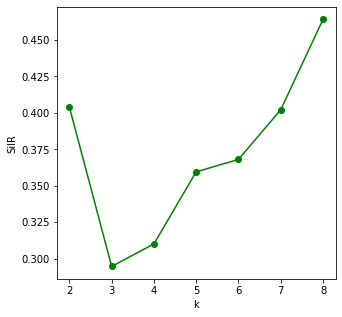

In [51]:
matplotlib.rcParams['figure.figsize']=[5,5]#ขนาดกราฟ
plt.plot([2,3,4,5,6,7,8],SilR,'o-g')
plt.xlabel('k')
plt.ylabel('SilR');

การทดลองนำค่า ที่ได้นั้นมาเเบ่งกลุ่ม

In [52]:
matplotlib.rcParams['figure.figsize']=[15,20]

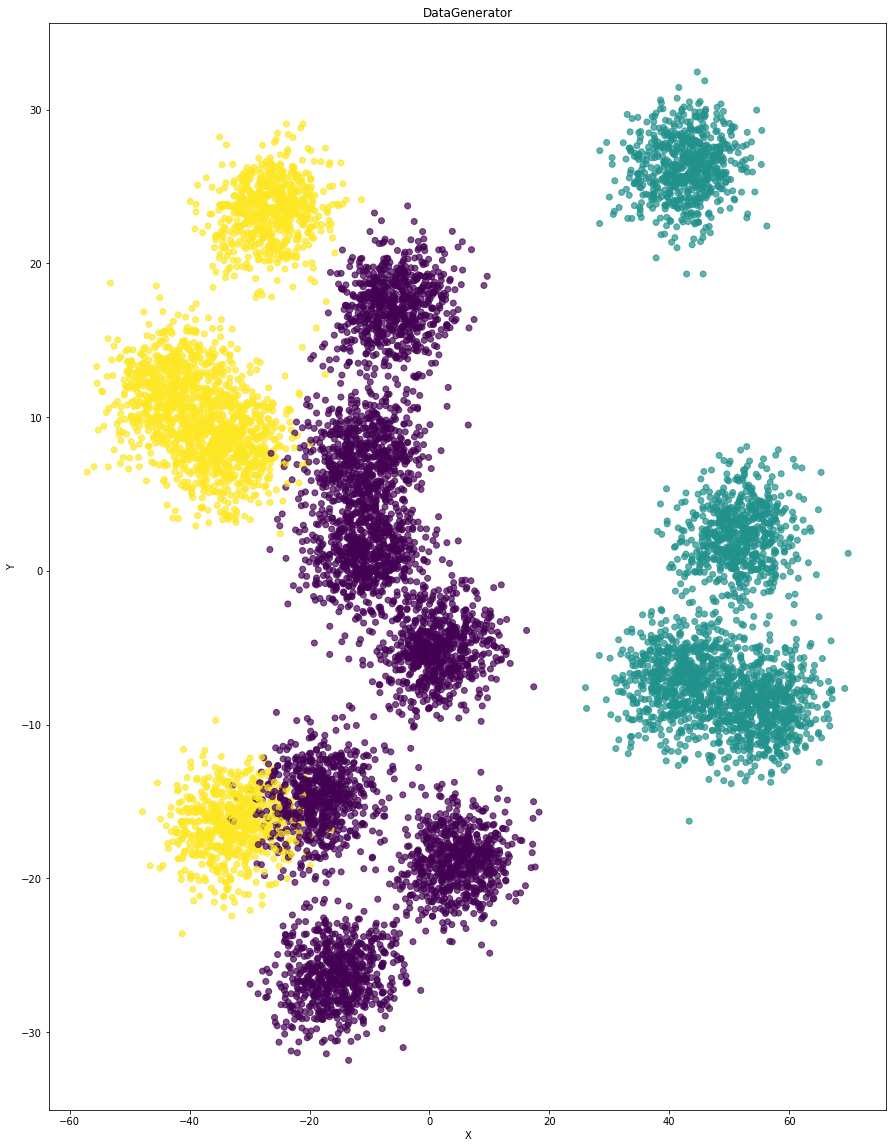

In [53]:
kmeans = KMeans(n_clusters = 3,random_state=2021)
kmeans.fit(Data)
E = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=H,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

## 3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 **มิติ**

## **MDS**

In [54]:
from sklearn.manifold import MDS

In [55]:
mds = MDS(n_components=2)

In [ ]:
new_mds = mds.fit_transform(Data)